In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

train_df = pd.read_csv(r"C:\Users\dongu\modu_train.csv")
test_df= pd.read_csv(r"C:\Users\dongu\modu_test.csv")

In [ ]:
train_df.head() 
#데이터 컬럼의 구성
# id, Time은 불필요 정보이며
# V1~V28은 그 특성을 알 수 없는 변수로 PCA로 구분되어 나온 데이터로 추측, 다만 V14, V4가 중요변수
# Amount, Class(타겟변수) 


,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
train_df.info()
#모두 숫자로 된 피쳐들

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170883 entries, 0 to 170882
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      170883 non-null  int64  
 1   Time    170883 non-null  float64
 2   V1      170883 non-null  float64
 3   V2      170883 non-null  float64
 4   V3      170883 non-null  float64
 5   V4      170883 non-null  float64
 6   V5      170883 non-null  float64
 7   V6      170883 non-null  float64
 8   V7      170883 non-null  float64
 9   V8      170883 non-null  float64
 10  V9      170883 non-null  float64
 11  V10     170883 non-null  float64
 12  V11     170883 non-null  float64
 13  V12     170883 non-null  float64
 14  V13     170883 non-null  float64
 15  V14     170883 non-null  float64
 16  V15     170883 non-null  float64
 17  V16     170883 non-null  float64
 18  V17     170883 non-null  float64
 19  V18     170883 non-null  float64
 20  V19     170883 non-null  float64
 21  V20     17

In [8]:
train_df.describe()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,...,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000
mean,85441.000000,61091.567090,-0.169838,0.040771,0.493037,0.117429,-0.176102,0.058235,-0.080669,0.032227,...,-0.028287,-0.083744,-0.022450,0.009008,0.092269,0.012603,0.002093,0.002445,87.336704,0.002107
std,49329.817362,27828.109419,1.850529,1.610874,1.383241,1.371910,1.338609,1.295123,1.208518,1.227630,...,0.743713,0.667318,0.584508,0.598760,0.465505,0.490660,0.391951,0.307315,245.954429,0.045851
min,0.000000,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,42720.500000,41216.500000,-0.986667,-0.539174,-0.064747,-0.743475,-0.828769,-0.691129,-0.586314,-0.162638,...,-0.230722,-0.546777,-0.170294,-0.332459,-0.195933,-0.330346,-0.065125,-0.027054,5.480000,0.000000
50%,85441.000000,60776.000000,-0.183560,0.109679,0.623352,0.124307,-0.226228,-0.202634,-0.031932,0.056664,...,-0.054462,-0.066786,-0.036211,0.059474,0.135662,-0.058966,0.008693,0.021152,21.890000,0.000000
75%,128161.500000,78622.000000,1.184446,0.804221,1.297352,0.937632,0.374445,0.449200,0.462616,0.350995,...,0.128337,0.363165,0.098707,0.415860,0.399458,0.272938,0.089727,0.078302,76.720000,0.000000
max,170882.000000,120396.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


<Axes: xlabel='Amount', ylabel='Class'>

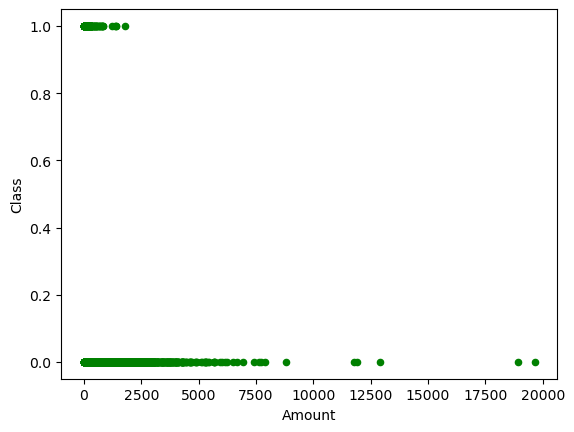

In [9]:
train_df.plot(kind='scatter', x= 'Amount', y='Class', color='g')

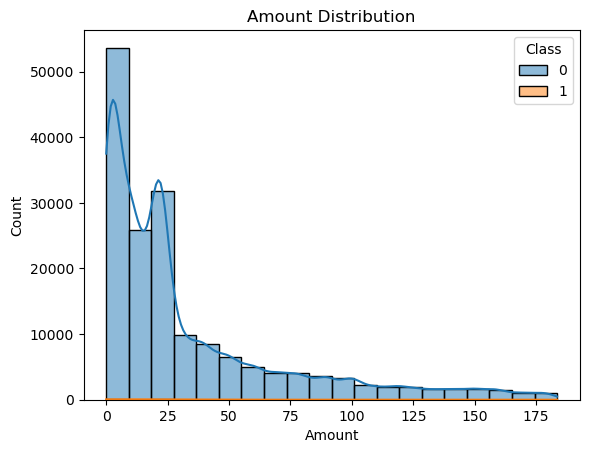

In [ ]:
sns.histplot(train_df, x='Amount', hue= 'Class', bins=20, kde=True, color='g')
plt.xlabel('Amount')
plt.title('Amount Distribution')
plt.show()
# fraud가 전체적인 비율은 적지만 다양한 금액대에서 나타나고 있음

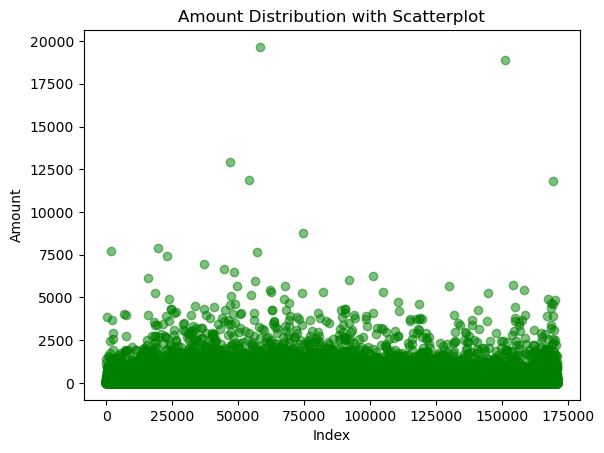

In [11]:
plt.scatter(range(len(train_df['Amount'])), train_df['Amount'], color='g', alpha=0.5)
plt.title('Amount Distribution with Scatterplot')
plt.ylabel('Amount')
plt.xlabel('Index')
plt.show()

<Axes: xlabel='Amount', ylabel='Count'>

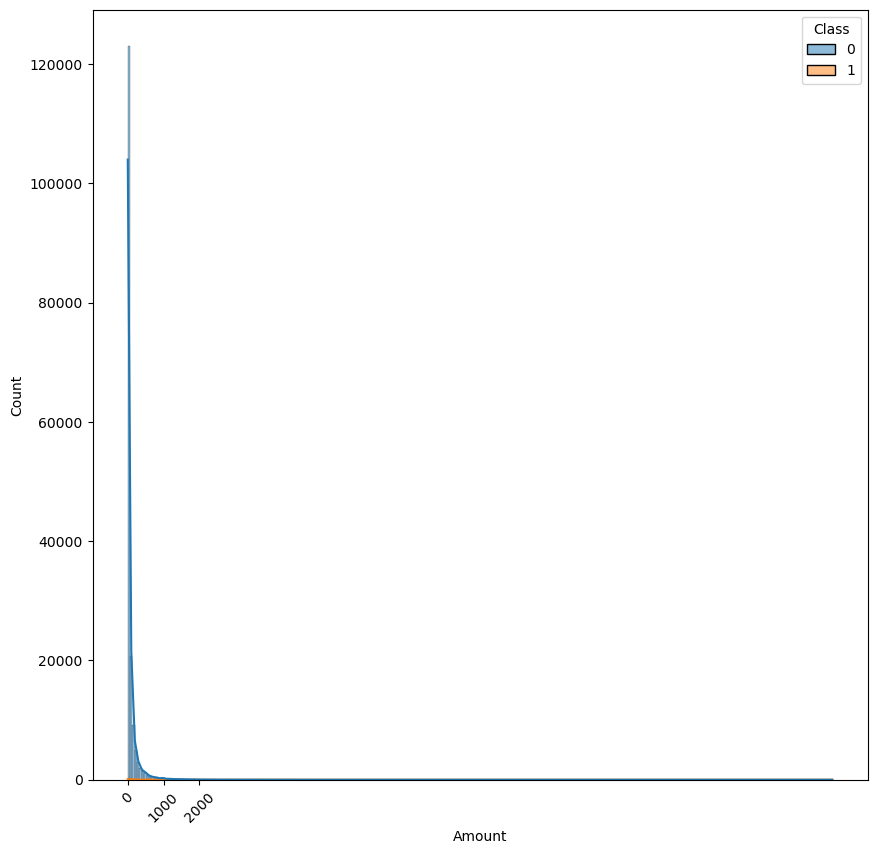

In [55]:
plt.figure(figsize=(10,10))
plt.xticks(range(0,3000,1000), rotation=45)
sns.histplot(train_df, x='Amount', hue='Class', bins=300, kde=True)


<Axes: >

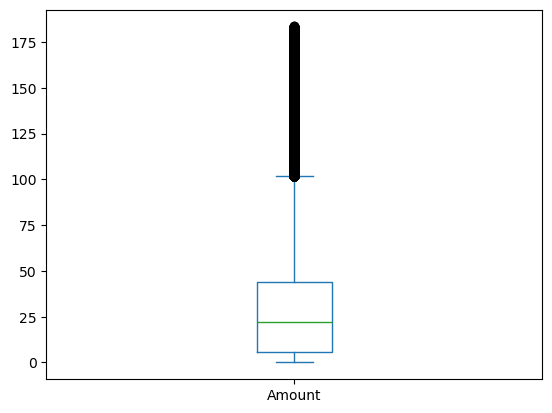

In [230]:
train_df['Amount'].plot(kind='box')

In [14]:
train_df.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
# null 값 확인
train_df.isnull().sum()

id        0
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [16]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install hyperopt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy
 
# 데이터를 분할


In [ ]:
def get_train_test_dataset(df=None):
    X_features = train_copy.iloc[:, :-1]
    y_target = train_copy.iloc[:, -1]
    valid_classes = y_target.value_counts()[y_target.value_counts() > 1].index
    train_df_copy = get_preprocessed_df(train_df)
    train_df_valid = train_df_copy[train_df_copy.iloc[:, -1].isin(valid_classes)]
   
    
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)
    return X_train, X_test, y_train, y_test

# valid_classes = y_target.value_counts()[y_target.value_counts() > 1].index
# df_valid = df_copy[df_copy.iloc[:, -1].isin(valid_classes)]
# X_features = df_valid.iloc[:, :-1]
# y_target = df_valid.iloc[:, -1]
# X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)


In [231]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=42, stratify=y_target)

In [232]:
print('학습 데이터 간 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('검증 데이터 간 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 간 레이블 값 비율
Class
0    99.789329
1     0.210671
Name: count, dtype: float64
검증 데이터 간 레이블 값 비율
Class
0    99.78933
1     0.21067
Name: count, dtype: float64


In [139]:
from sklearn.linear_model import LogisticRegression

# 학습
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)

# 검증
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

print('학습 완료!')

학습 완료!


In [140]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬:\n', confusion)
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(f1))
    print('AUC: {:.4f}'.format(roc_auc))

In [141]:
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬:
 [[34094    11]
 [   29    43]]
정확도: 0.9988
정밀도: 0.7963
재현율: 0.5972
F1: 0.6825
AUC: 0.9587


In [142]:
def get_model_train_eval(model, ftr_train= None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [143]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

[LightGBM] [Info] Number of positive: 288, number of negative: 136418
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 136706, number of used features: 30
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

In [144]:
# 정밀도: 1.0000 과적합된 현상
# 재현율: 0.8333
# F1: 0.9091
# AUC: 0.9681

In [145]:
from sklearn.preprocessing import StandardScaler #정규화
scaler = StandardScaler()
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount = df_copy['Amount']
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    df_copy['Amount'] = scaler.fit_transform(amount.values.reshape(-1,1))
    return df_copy

In [146]:
# X_train, X_test, y_train, y_test = get_train_test_dataset(train_df)
# X_train, X_test, y_train, y_test = get_train_test_dataset()
# print("로지스틱 회귀 예측 성능")
# lr_clf = LogisticRegression(max_iter=1000)
# get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

# print("LightGBM 예측 성능")
# lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
# get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

X_train, X_test, y_train, y_test = get_train_test_dataset(train_df)
print("로지스틱 회귀 예측 성능")
lr_clf = LogisticRegression(max_iter=1000)
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print("LightGBM 예측 성능")
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

로지스틱 회귀 예측 성능
오차 행렬:
 [[51130    17]
 [   49    69]]
정확도: 0.9987
정밀도: 0.8023
재현율: 0.5847
F1: 0.6765
AUC: 0.9619
LightGBM 예측 성능
[LightGBM] [Info] Number of positive: 242, number of negative: 119376
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 119618, number of used features: 30
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [147]:
#AUC상으로 LightGBM이 보다 좋은 결과를 보임, 또한 로지스틱회귀는 과적합을 보임

In [163]:
def get_preprocessed_df(df=None):
    df_copy = train_df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)

    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [164]:
X_train, X_test, y_train, y_test = get_train_test_dataset(train_df)

print('로지스틱 회귀 예측 성능')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('LightGBM예측 성능')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

로지스틱 회귀 예측 성능
오차 행렬:
 [[51130    17]
 [   49    69]]
정확도: 0.9987
정밀도: 0.8023
재현율: 0.5847
F1: 0.6765
AUC: 0.9619
LightGBM예측 성능
[LightGBM] [Info] Number of positive: 242, number of negative: 119376
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007533 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 119618, number of used features: 30
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [165]:
#outlier의 수정

Q1 = train_df['Amount'].quantile(0.25)
Q3 = train_df['Amount'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

median_value = train_df['Amount'].median()

train_df['Amount'] = np.where((train_df['Amount'] > upper_bound) | (train_df['Amount'] < lower_bound), median_value, train_df['Amount'])

print(train_df)

            id      Time        V1        V2        V3        V4        V5  \
0            0       0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1            1       0.0  1.191857  0.266151  0.166480  0.448154  0.060018   
2            2       1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3            3       1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4            4       2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193   
...        ...       ...       ...       ...       ...       ...       ...   
170878  170878  120394.0  2.085243  0.153914 -1.937797  0.455977  0.457744   
170879  170879  120395.0  1.941601 -0.105717 -2.025099  0.021689  1.257679   
170880  170880  120395.0 -0.184060  1.192288 -0.831053 -0.379134  0.898165   
170881  170881  120395.0  1.418125 -1.676690 -0.942455  0.734790 -0.915707   
170882  170882  120396.0 -1.484133  0.482801  0.581427 -1.366978  1.357335   

              V6        V7        V8  ...       V21       V22  

<Axes: >

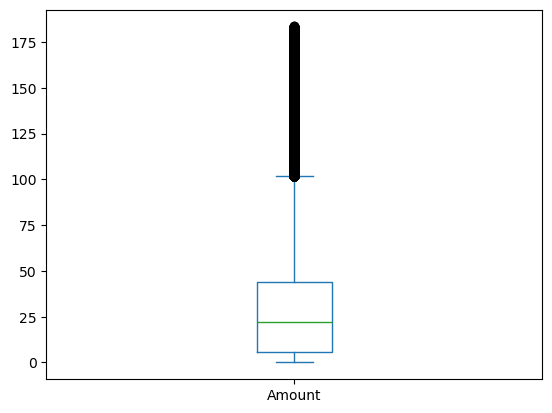

In [166]:
train_df['Amount'].plot(kind='box')

<Axes: >

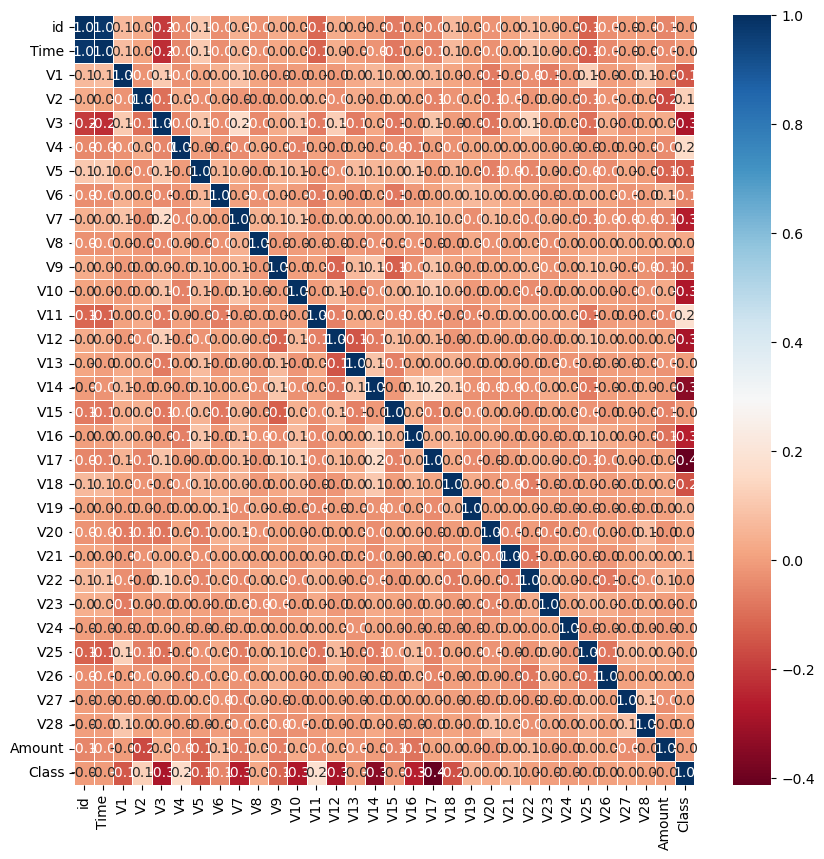

In [168]:
plt.figure(figsize=(10,10))
corr = train_df.corr()
sns.heatmap(corr, cmap='RdBu', annot=True, fmt='.1f', linewidths=0.5)

In [172]:
def get_outlier_index(df=None, column=None, weight=1.5):
    fraud = df[df['Class']==1][column]
    Q2 = np.percentile(fraud.values,25)
    Q3 = np.percentile(fraud.values,75)
    IQR = Q3 - Q2
    lower_bound = Q2 - (IQR * weight)
    upper_bound = Q3 + (IQR * weight)
    outlier_index = fraud[(fraud < lower_bound) | (fraud > upper_bound)].index
    return outlier_index

In [173]:
outlier_index = get_outlier_index(train_df, 'V14',weight=1.5)
print('이상치 데이터 인덱스:',outlier_index)

이상치 데이터 인덱스: Index([8296, 8615, 9035], dtype='int64')


In [175]:
def get_preprocessed_df(df=None):
    df_copy = train_df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    outlier_index = get_outlier_index(df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(train_df)

print('로지스틱 회귀 예측 성능')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('LightGBM예측 성능')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


로지스틱 회귀 예측 성능
오차 행렬:
 [[51130    17]
 [   49    69]]
정확도: 0.9987
정밀도: 0.8023
재현율: 0.5847
F1: 0.6765
AUC: 0.9619
LightGBM예측 성능
[LightGBM] [Info] Number of positive: 242, number of negative: 119376
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 119618, number of used features: 30
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [176]:
from imblearn.over_sampling import SMOTE


In [183]:
smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:',X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:',X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포:\n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트: (119618, 30) (119618,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: (238752, 30) (238752,)
SMOTE 적용 후 레이블 값 분포:
 Class
0    119376
1    119376
Name: count, dtype: int64


In [184]:
lr_clf = LogisticRegression(max_iter=1000)
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬:
 [[50638   509]
 [   13   105]]
정확도: 0.9898
정밀도: 0.1710
재현율: 0.8898
F1: 0.2869
AUC: 0.9757


In [185]:
# 로지스틱스
# 정확도: 0.9987
# 정밀도: 0.8023
# 재현율: 0.5847
# F1: 0.6765
# AUC: 0.9619
# LightGBM예측 성능

# 정밀도: 0.9785
# 재현율: 0.7712
# F1: 0.8626
# AUC: 0.9777
# 결과 비교: 정밀도가 0.17로 급격히 하락, 재현율이 0.58로 하락, F1도 0.28로 하락

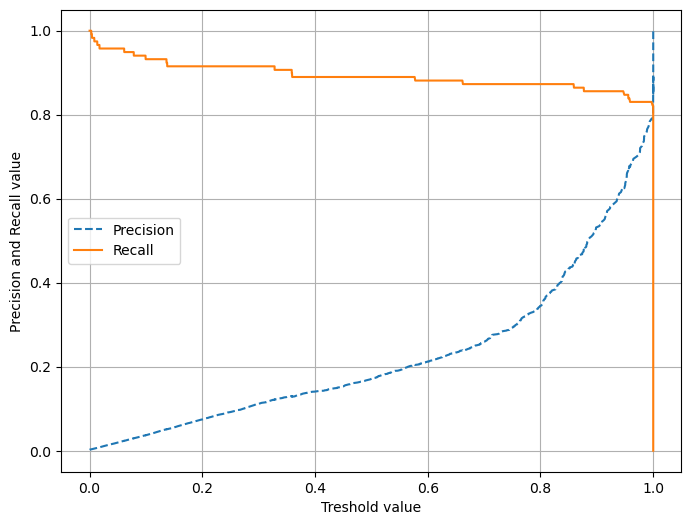

In [190]:
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
    from sklearn.metrics import precision_recall_curve
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    plt.figure(figsize=(8,6))
    plt.plot(thresholds, precisions[1:], linestyle='--', label='Precision')
    plt.plot(thresholds, recalls[1:], label='Recall')
    plt.xlabel('Treshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [192]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)


[LightGBM] [Info] Number of positive: 119376, number of negative: 119376
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019739 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 238752, number of used features: 30
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

In [194]:
# 재현율을 높이기 위한 방안으로 SMOTE를 적용하기 때문에 0.85가 안했을 경우의 0.77보다 크다

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

X = train_df.drop('Class', axis=1)
y = train_df['Class']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

# 모델 설정(하이퍼파라미터 튜닝 대상 모델)

model = RandomForestClassifier(random_state=42)

# 하이퍼파라미터 그리드 정의
# 탐색할 하이퍼파라미터 값들을 딕셔너리 형태로 지정합니다.
# n_estimators: 트리의 개수
# max_depth: 트리의 최대 깊이
# min_samples_split: 노드를 분할하기 위한 최소 샘플 수
param_grid = {
    # 'n_estimators': [100, 200, 300],
    # 'max_depth': [None, 10, 20],
    # 'min_samples_split': [2, 5, 10]
    'n_estimators': [100],
    'max_depth': [None, 20],
    'min_samples_split': [2]
}


grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  
)

grid_search.fit(X_train, y_train)


print("최적의 하이퍼파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)


best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("테스트 데이터셋 정확도:", accuracy)

최적의 하이퍼파라미터: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
최고 정확도: 0.9994064460824518
테스트 데이터셋 정확도: 0.9996488832536818


In [197]:
# 최적의 하이퍼파라미터: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
# 최고 정확도: 0.9994064460824518
# 테스트 데이터셋 정확도: 0.9996488832536818
# 소비시간 41분로 최적화 값을 적용하여 수정함

In [207]:
X_features = train_df.iloc[:, :-1]
y_labels =train_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(170883, 31)


In [209]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size =0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, Test Set Shape:{1}'.format(X_train.shape, X_test.shape))

print('학습 셋트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 셋트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(136706, 31), Test Set Shape:(34177, 31)
학습 셋트 레이블 값 분포 비율
Class
0    0.997974
1    0.002026
Name: count, dtype: float64

 테스트 셋트 레이블 값 분포 비율
Class
0    0.997571
1    0.002429
Name: count, dtype: float64


In [210]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [212]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimator = 500, 
                        learning_rate = 0.05, 
                        random_state = 42,
                        early_stopping_rounds = 100,
                        eval_metric='auc')
xgb_clf.fit(X_tr, y_tr,  eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])

print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.98266	validation_1-auc:0.95017
[1]	validation_0-auc:0.98727	validation_1-auc:0.97128
[2]	validation_0-auc:0.98782	validation_1-auc:0.97154
[3]	validation_0-auc:0.98758	validation_1-auc:0.97332
[4]	validation_0-auc:0.98755	validation_1-auc:0.97379
[5]	validation_0-auc:0.98765	validation_1-auc:0.97407
[6]	validation_0-auc:0.98988	validation_1-auc:0.97414
[7]	validation_0-auc:0.99191	validation_1-auc:0.97348
[8]	validation_0-auc:0.99194	validation_1-auc:0.97292
[9]	validation_0-auc:0.99232	validation_1-auc:0.97308
[10]	validation_0-auc:0.99268	validation_1-auc:0.97245
[11]	validation_0-auc:0.99294	validation_1-auc:0.97214
[12]	validation_0-auc:0.99304	validation_1-auc:0.97185
[13]	validation_0-auc:0.99509	validation_1-auc:0.97085
[14]	validation_0-auc:0.99507	validation_1-auc:0.97079
[15]	validation_0-auc:0.99524	validation_1-auc:0.97019
[16]	validation_0-auc:0.99549	validation_1-auc:0.97375
[17]	validation_0-auc:0.99563	validation_1-auc:0.97376
[18]	validation_0-au

In [213]:
# ROC AUC: 0.9489

In [214]:
from hyperopt import hp
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1),
                    'min_child_weight':hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree':hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01,0.2)}

In [215]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import numpy as np

def objective_func(search_space):
    xgb_clf = XGBClassifier(n_setimators=100, max_depth = int(search_space['max_depth']),
                            min_child_weight = int(search_space['min_child_weight']),
                            colsample_bytree = search_space['colsample_bytree'],
                            learning_rate = search_space['learning_rate'],
                            early_stopping_rounds = 100,
                            eval_metric='auc')

    roc_auc_list=[ ]

    kf = KFold(n_splits=3)

    for tr_index, val_index in kf.split(X_train):
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        xgb_clf.fit(X_tr, y_tr, eval_set=[(X_tr,y_tr), (X_val, y_val)])

        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
    
    return -1*np.mean(roc_auc_list)

In [216]:
from hyperopt import fmin, tpe, Trials

trials = Trials()
best = fmin(fn=objective_func,
            space = xgb_search_space,
            algo = tpe.suggest,
            max_evals = 10,
            trials = trials, rstate = np.random.default_rng(seed=30))
print('best:',best)

[0]	validation_0-auc:0.98198	validation_1-auc:0.97366 
[1]	validation_0-auc:0.98579	validation_1-auc:0.97874 
[2]	validation_0-auc:0.98993	validation_1-auc:0.98850 
[3]	validation_0-auc:0.99288	validation_1-auc:0.98871 
[4]	validation_0-auc:0.99233	validation_1-auc:0.98842 
[5]	validation_0-auc:0.99221	validation_1-auc:0.98798 
[6]	validation_0-auc:0.99185	validation_1-auc:0.98789 
[7]	validation_0-auc:0.99172	validation_1-auc:0.98803 
[8]	validation_0-auc:0.99124	validation_1-auc:0.98710 
[9]	validation_0-auc:0.99139	validation_1-auc:0.98623 
[10]	validation_0-auc:0.99138	validation_1-auc:0.98655
[11]	validation_0-auc:0.99120	validation_1-auc:0.98630
[12]	validation_0-auc:0.99218	validation_1-auc:0.98550
[13]	validation_0-auc:0.99245	validation_1-auc:0.98571
[14]	validation_0-auc:0.99252	validation_1-auc:0.98581
[15]	validation_0-auc:0.99278	validation_1-auc:0.98558
[16]	validation_0-auc:0.99343	validation_1-auc:0.98758
[17]	validation_0-auc:0.99389	validation_1-auc:0.98706
[18]	valid

In [217]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

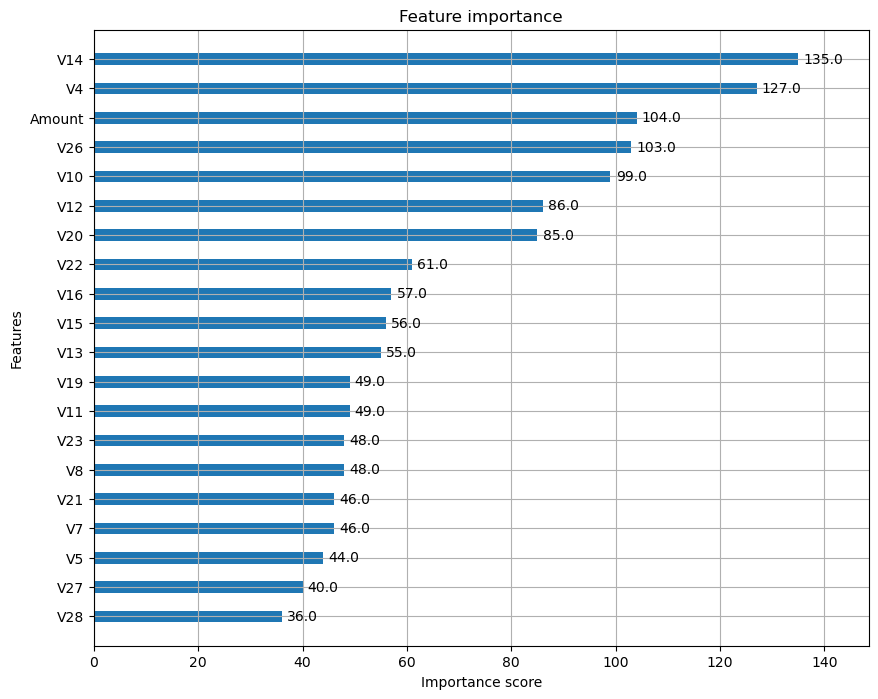

In [219]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

In [220]:
#주요요인으로 v14, v4, Amount, v26, v10, v12, v20

In [221]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_etimators=500, early_stopping_rounds=100, eval_metric='auc')

eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr,y_tr, eval_set=eval_set)

lgbm_roc_score=roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: n_etimators
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] Unknown parameter: n_etimators
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 187, number of negative: 95507
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7905
[LightGBM] [Info] Number of data points in the train set: 95694, number of used features: 31
[LightGBM] [Warning] Unknown parameter: n_etimators
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001954

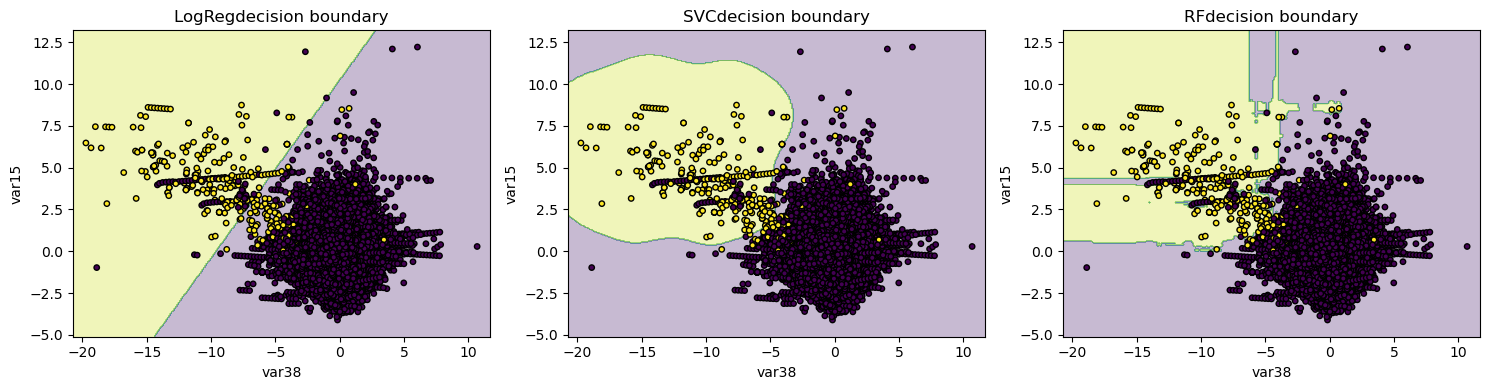

In [224]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# 두 피처만 사용
X2 = train_df[['V14', 'V4']].values
# v14, v4, Amount, v26, v10, v12, v20
y2 = train_df['Class']

scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

# 여러 모델 정의

models2d = {
    "LogReg": LogisticRegression(max_iter=1000),
    "SVC": SVC(kernel="rbf", gamma=0.1, C=1, probability=True),
    "RF": RandomForestClassifier(n_estimators=200, random_state=42)
}

xx, yy = np.meshgrid(
    np.linspace(X2_scaled[:,0].min()-1, X2_scaled[:,0].max()+1, 300),
    np.linspace(X2_scaled[:,1].min()-1, X2_scaled[:,1].max()+1, 300)
)

plt.figure(figsize=(15,4))
for i,(name,clf) in enumerate(models2d.items(),1):
    clf.fit(X2_scaled, y2)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.subplot(1,3,i)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X2_scaled[:,0], X2_scaled[:,1], c=y2, edgecolor='k', cmap='viridis', s=15)
    plt.title(name + "decision boundary")
    plt.xlabel("var38"); plt.ylabel("var15")
plt.tight_layout(); plt.show()

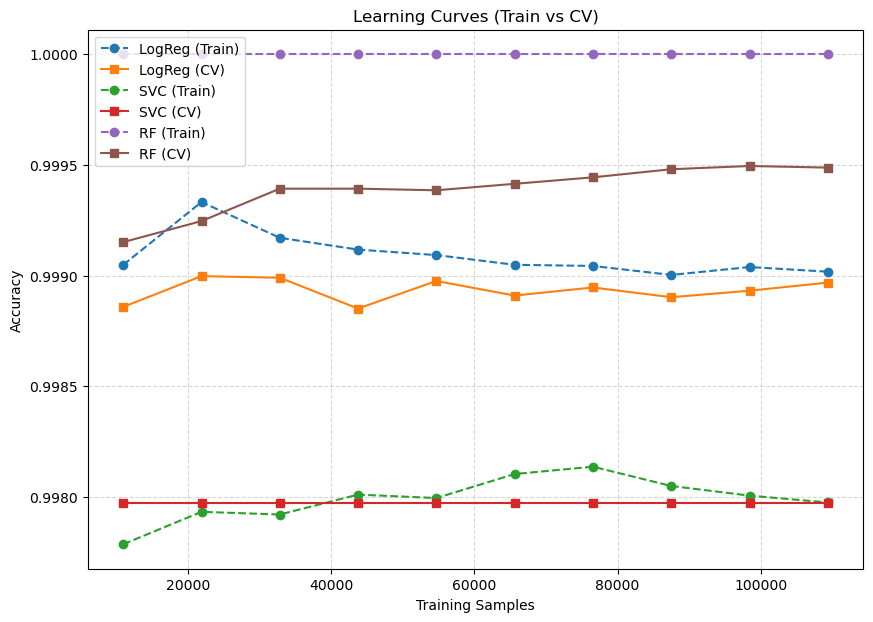

In [225]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = {
    "LogReg": LogisticRegression(max_iter=1000),
    "SVC": SVC(),
    "RF": RandomForestClassifier(n_estimators=200, random_state=42)
}

plt.figure(figsize=(10,7))
for name, model in models.items():
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )
    train_mean = train_scores.mean(axis=1)
    val_mean   = val_scores.mean(axis=1)

    # Train curve
    plt.plot(train_sizes, train_mean, '--', marker='o', label=f"{name} (Train)")
    # Validation curve
    plt.plot(train_sizes, val_mean, '-',  marker='s', label=f"{name} (CV)")

plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.title("Learning Curves (Train vs CV)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [226]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    cv_acc = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    print(f"{name:6s} | Train Acc: {train_acc:.3f} | CV Acc: {cv_acc:.3f} | Gap: {train_acc - cv_acc:.3f}")

LogReg | Train Acc: 0.999 | CV Acc: 0.999 | Gap: -0.000
SVC    | Train Acc: 0.998 | CV Acc: 0.998 | Gap: -0.000
RF     | Train Acc: 1.000 | CV Acc: 0.999 | Gap: 0.001


In [233]:
# 로지스틱 회귀, SVM, RM(랜덤포레스트)의 훈련데이터와 교차검증(CV) 데이터에서 모두 높은 성능을 보임
# 두 값의 갭이 거의 없어 과적합이 없음
# 하지만 RM은 과적합의 양상을 보임